#  Section 1: Introduction to Optimization in Machine Learning


## 1.1 What is Optimization?

- Optimization is the process of minimizing (or maximizing) a function by systematically choosing input values from a feasible set and evaluating the function.
- In machine learning, this typically means minimizing a loss function to find the best parameters for a model.

## 1.2 Role in Machine Learning
- Machine learning models learn by minimizing a **loss function** that quantifies the difference between the predicted output and the actual ground truth.

- Optimization Goal
  - We want to find the model parameters θ that minimize the loss function
  - **Optimization goal:**

$$
\min_{\theta} \mathcal{L}(\theta)
$$

  - θ: Parameters of the model (e.g., weights in linear regression or neural networks)  
  - L(θ) : Loss function (e.g., **Mean Squared Error**, **Cross Entropy**)


## 1.3  Example Applications

| ML Task             | Optimization Target                                |
| ------------------- | -------------------------------------------------- |
| Linear Regression   | Minimize Mean Squared Error (MSE)                  |
| Logistic Regression | Minimize Binary Cross-Entropy                      |
| Neural Networks     | Minimize complex non-convex loss using Adam or SGD |
| SVM                 | Maximize margin, minimize hinge loss               |


## 1.4  Types of Optimization
- Unconstrained Optimization: No restrictions on the variables
- Constrained Optimization: Variables must satisfy certain conditions (e.g., Lagrange Multipliers)
- Convex Optimization: Guarantees global minimum
- Non-Convex Optimization: May get stuck in local minima

## 1.5 Typical ML Optimization Pipeline
1. Define the model
2. Choose a loss function
3. Initialize model parameters
4. Use optimization algorithm (like GD or Adam) to minimize the loss


## 1.6 Simple Optimization Demo

- We want to minimize the function:

$$
f(x) = (x - 3)^2
$$


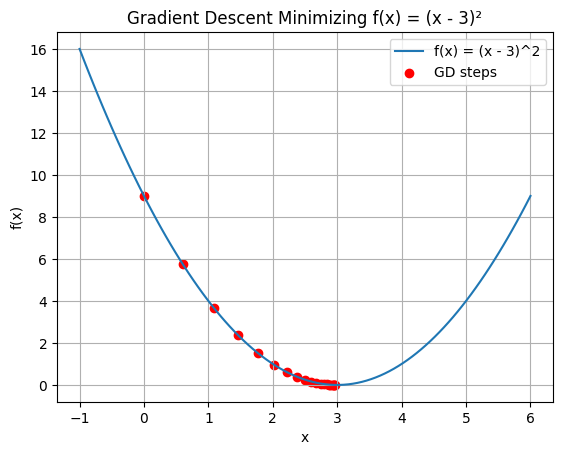

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function and its gradient
def f(x):
    return (x - 3)**2

def grad_f(x):
    return 2 * (x - 3)

# Gradient Descent function
def gradient_descent(start, learning_rate=0.1, n_iter=20):
    x = start
    history = [x]

    for _ in range(n_iter):
        x -= learning_rate * grad_f(x)
        history.append(x)

    return history

# Run GD
x_vals = gradient_descent(start=0.0)

# Plotting
x_range = np.linspace(-1, 6, 100)
plt.plot(x_range, f(x_range), label="f(x) = (x - 3)^2")
plt.scatter(x_vals, [f(x) for x in x_vals], color='red', label="GD steps")
plt.title("Gradient Descent Minimizing f(x) = (x - 3)²")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# Section 2: Gradient Descent from Scratch

## 2.1 What is Gradient Descent?
- Gradient Descent is an iterative optimization algorithm used to minimize a function by moving in the direction of the negative gradient (steepest descent).

## 2.2 Update Rule in Gradient Descent

For a function \( f(x) \), the update rule is:

$$
x_{t+1} = x_t - \eta \cdot \nabla f(x_t)
$$

### Where:
- x_t : current point  
- η : learning rate (step size)  
- η . ∇f(xt) : gradient at the current point

## 2.3 Intuition

- If ∇f(xt) > 0 : move **left** (decrease \( x \))  
- If ∇f(xt) < 0 : move **right** (increase \( x \))  
- Keep updating until the gradient is close to **0** — which means we've reached a **local minimum**.

## 2.4  Pros and Cons

| Pros                           | Cons                                                 |
| ------------------------------ | ---------------------------------------------------- |
| Simple and intuitive           | Sensitive to learning rate $\eta$                    |
| Works well for convex problems | Can get stuck in local minima in non-convex problems |


## 2.5 Gradient Descent on \( f(x) = x^2 + 4x + 4 \)

We can rewrite the function as:

$$
f(x) = (x + 2)^2
$$

This is a convex quadratic function with a **minimum at**:

$$
x = -2
$$


###  Applying Gradient Descent

1. **Function**:  
   $$
   f(x) = x^2 + 4x + 4
   $$

2. **Gradient (derivative)**:  
   $$
   f'(x) = 2x + 4
   $$

3. **Update rule**:  
   $$
   x_{t+1} = x_t - \eta \cdot f'(x_t)
   $$

4. **Substitute the gradient**:  
   $$
   x_{t+1} = x_t - \eta (2x_t + 4)
   $$

Repeat this update until convergence (when the gradient approaches 0).

###  Intuition

- If \( x > -2 \), then \( f'(x) > 0 \) → move **left**
- If \( x < -2 \), then \( f'(x) < 0 \) → move **right**
- Gradient descent will eventually **converge to \( x = -2 \)**, where \( f(x) \) is minimum.


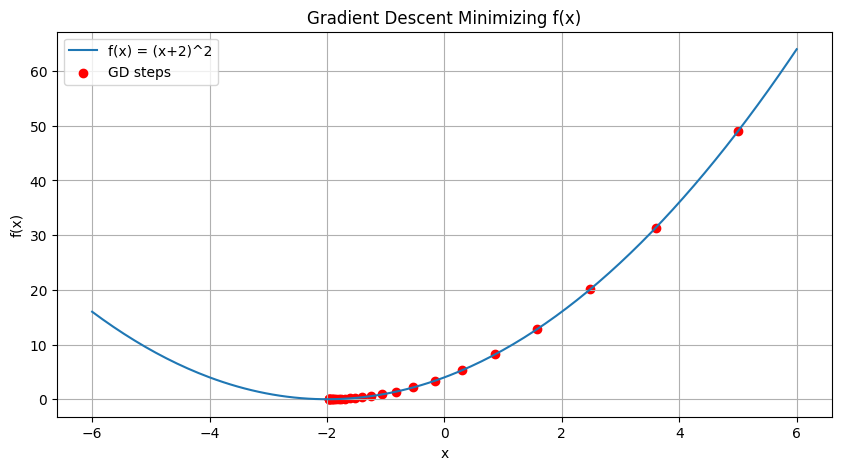

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x):
    return x**2 + 4*x + 4  # Equivalent to (x + 2)^2

def grad_f(x):
    return 2*x + 4

# Gradient Descent Algorithm
def gradient_descent(start, lr=0.1, iterations=25):
    x = start
    history = [x]

    for _ in range(iterations):
        x = x - lr * grad_f(x)
        history.append(x)

    return history

# Run GD
start_x = 5
x_vals = gradient_descent(start=start_x)

# Visualize
x_plot = np.linspace(-6, 6, 200)
y_plot = f(x_plot)

plt.figure(figsize=(10, 5))
plt.plot(x_plot, y_plot, label='f(x) = (x+2)^2')
plt.scatter(x_vals, [f(x) for x in x_vals], color='red', label='GD steps')
plt.title("Gradient Descent Minimizing f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

In [3]:
print(f"Final x after GD: {x_vals[-1]:.4f}")
print(f"f(x) at minimum: {f(x_vals[-1]):.4f}")

Final x after GD: -1.9736
f(x) at minimum: 0.0007


## What the Plot Shows
- What the Plot Shows

### Blue Curve:
The function  
$$
f(x) = (x + 2)^2
$$  
is **convex** and has a **global minimum** at:  
$$
x = -2
$$


###  Red Dots:
Each red dot represents a step taken by **Gradient Descent** starting from an initial point (e.g.,  
$$
x = 6
$$  
or some other arbitrary positive value).

###  Final Cluster:
The red dots **cluster around**  
$$
x = -2
$$  
as gradient descent progresses — indicating **convergence to the minimum**.


### What You Can Learn from It

| Feature                | Insight                                                                |
| ---------------------- | ---------------------------------------------------------------------- |
| Shape of function      | Convex — single minimum, ideal for gradient descent                    |
| Step trajectory        | Moves steadily downhill along the slope                                |
| Learning rate behavior | Smooth convergence (not overshooting or stuck), indicating good tuning |
| Convergence point      | Accurately reaches the minimum ($x = -2$) as expected                  |


# Section 3: Variants of Gradient Descent

## 3.1 Types of Gradient Descent

### 1. Batch Gradient Descent (BGD)

- Uses the **entire dataset** to compute the gradient.
-  Accurate gradients.
-  **Slow** and **memory-intensive** for large datasets.
- **Update Rule**:
$$
\theta := \theta - \eta \cdot \nabla_\theta J(\theta)
$$

Where:
- θ : model parameters  
- η : learning rate  
- J(θ) : loss function computed over **all training data**

---

### 2. Stochastic Gradient Descent (SGD)

- Uses **only one data point** to update parameters.
- **Fast** and **memory-efficient**
- Noisy updates → may **oscillate**, but often escapes local minima
- **Update Rule**:
$$
\theta := \theta - \eta \cdot \nabla_\theta J(\theta; x^{(i)}, y^{(i)})
$$

Where:
- x(i),y(i) : a single training example  
- Gradient computed for **one sample at a time**

---

### 3. Mini-batch Gradient Descent

- A **compromise** between BGD and SGD
- Uses small random batches (e.g., 32 or 64 samples)
- Faster than BGD, smoother than SGD
- Most popular in **deep learning** (e.g., PyTorch, TensorFlow)
- **Update Rule**:
$$
\theta := \theta - \eta \cdot \nabla_\theta J(\theta; \mathcal{B})
$$

Where:
- (θ;B) : a mini-batch of training data

---

### **Summary**:

| Type       | Speed     | Accuracy   | Memory  | Notes                           |
|------------|-----------|------------|---------|----------------------------------|
| BGD        |  Slow    |  Accurate |  High  | Full dataset per update         |
| SGD        |  Fast    |  Noisy   |  Low   | One example per update          |
| Mini-batch | Balanced |  Smooth  |  Medium | Best of both worlds             |


##Let’s simulate a simple linear regression task to compare all 3.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic linear data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term
X_b = np.c_[np.ones((100, 1)), X]

# Cost function
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Batch GD
def batch_gradient_descent(X, y, theta, learning_rate=0.1, n_iters=100):
    m = len(y)
    cost_history = []
    for _ in range(n_iters):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(theta, X, y))
    return theta, cost_history

# Stochastic GD
def stochastic_gradient_descent(X, y, theta, learning_rate=0.1, n_iters=50):
    m = len(y)
    cost_history = []
    for epoch in range(n_iters):
        for i in range(m):
            rand_index = np.random.randint(m)
            xi = X[rand_index:rand_index+1]
            yi = y[rand_index:rand_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            cost_history.append(compute_cost(theta, X, y))
    return theta, cost_history

# Mini-batch GD
def mini_batch_gradient_descent(X, y, theta, learning_rate=0.1, batch_size=20, n_iters=50):
    m = len(y)
    cost_history = []
    for epoch in range(n_iters):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = (1/len(xi)) * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            cost_history.append(compute_cost(theta, X, y))
    return theta, cost_history

### Visualization


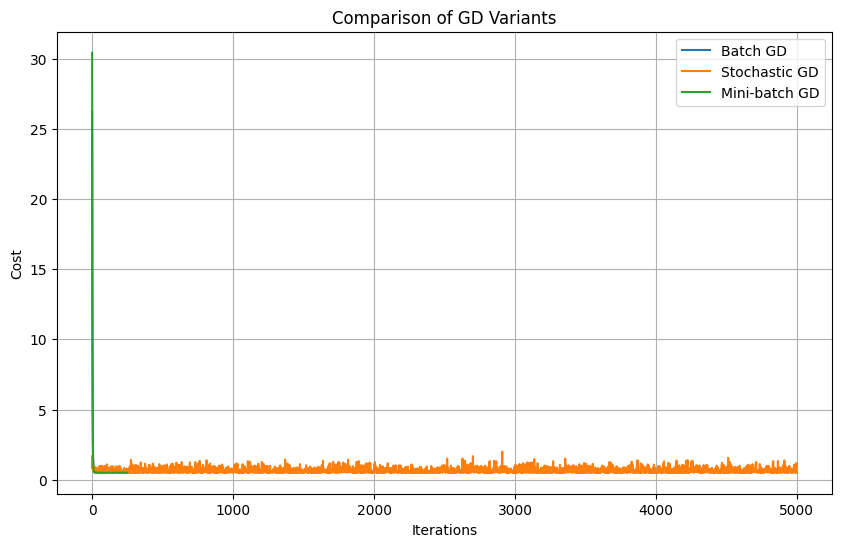

In [5]:
initial_theta = np.random.randn(2,1)

theta_bgd, cost_bgd = batch_gradient_descent(X_b, y, initial_theta.copy())
theta_sgd, cost_sgd = stochastic_gradient_descent(X_b, y, initial_theta.copy())
theta_mgd, cost_mgd = mini_batch_gradient_descent(X_b, y, initial_theta.copy())

plt.figure(figsize=(10,6))
plt.plot(cost_bgd, label='Batch GD')
plt.plot(cost_sgd, label='Stochastic GD')
plt.plot(cost_mgd, label='Mini-batch GD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Comparison of GD Variants')
plt.legend()
plt.grid(True)
plt.show()

### Insights

| Variant        | Speed       | Stability | Memory      | Use Case                   |
| -------------- | ----------- | --------- | ----------- | -------------------------- |
| **Batch GD**   |  Slow      |  Stable  |  High      | Small datasets             |
| **SGD**        |  Fast      |  Noisy   |  Low       | Large online updates       |
| **Mini-batch** |  Balanced |  Stable  |  Balanced | Deep learning & production |


# Section 4: Momentum, Nesterov, RMSProp, Adam

## 4.1  Momentum Optimizer

- **Idea:** Adds a “velocity” term to accelerate updates in consistent gradient directions and dampen oscillations.
- **Update Rule:**
$$
v_t = \beta v_{t-1} + (1 - \beta) \nabla_\theta J(\theta) \\
\theta = \theta - \eta v_t
$$

-  β in [0.9, 0.99] : momentum term  
- Accelerates in valleys and reduces zigzagging


## 4.2 Nesterov Accelerated Gradient (NAG)

- **Idea:** Improves Momentum by “looking ahead” — calculating the gradient not at the current position but at the estimated future position.

- **Update Rule:**
$$
v_t = \beta v_{t-1} + \eta \nabla_\theta J(\theta - \beta v_{t-1}) \\
\theta = \theta - v_t
$$

- More **accurate gradient direction**
- Faster convergence than classical Momentum

## 4.3 RMSProp (Root Mean Square Propagation)

- **Idea:** Adapts the learning rate for each parameter individually using a moving average of squared gradients.

- **Update Rule:**
$$
s_t = \beta s_{t-1} + (1 - \beta) \left( \nabla_\theta J(\theta) \right)^2 \\
\theta = \theta - \frac{\eta}{\sqrt{s_t + \epsilon}} \cdot \nabla_\theta J(\theta)
$$

- ϵ : small constant to avoid division by zero
- Works well for **non-stationary objectives**
- Especially useful for **RNNs**

## 4.4 Adam (Adaptive Moment Estimation)

- **Idea:** Combines the benefits of **Momentum** and **RMSProp**.
- **Update Rule:**

  - **Momentum term:**
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla_\theta J(\theta)
$$

  - **RMS term:**
$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) \left( \nabla_\theta J(\theta) \right)^2
$$

  - **Bias-corrected estimates:**
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

  - **Parameter update:**
$$
\theta = \theta - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t
$$

- Fast convergence  
- Works well for **sparse gradients**

## 4.5 Summary Table

| Optimizer | Key Idea                                | Strengths                            |
|-----------|------------------------------------------|--------------------------------------|
| Momentum  | Adds velocity to updates                 | Faster convergence, less zigzag      |
| NAG       | Looks ahead before updating              | Smarter updates, faster convergence  |
| RMSProp   | Scales learning rate by gradient history | Works well in RNNs, adaptive rates   |
| Adam      | Combines Momentum + RMSProp              | Most widely used, efficient & robust |

## 4.6 Minimize the function:

$$
f(x) = (x + 2)^2
$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define function and gradient
def f(x):
    return (x + 2)**2

def grad_f(x):
    return 2*(x + 2)

# Optimizers
def momentum(x0, lr=0.1, beta=0.9, n_iter=20):
    x = x0
    v = 0
    path = [x]
    for _ in range(n_iter):
        g = grad_f(x)
        v = beta * v + (1 - beta) * g
        x = x - lr * v
        path.append(x)
    return path

def nesterov(x0, lr=0.1, beta=0.9, n_iter=20):
    x = x0
    v = 0
    path = [x]
    for _ in range(n_iter):
        g = grad_f(x - beta * v)
        v = beta * v + (1 - beta) * g
        x = x - lr * v
        path.append(x)
    return path

def rmsprop(x0, lr=0.1, beta=0.9, epsilon=1e-8, n_iter=20):
    x = x0
    s = 0
    path = [x]
    for _ in range(n_iter):
        g = grad_f(x)
        s = beta * s + (1 - beta) * (g ** 2)
        x = x - lr * g / (np.sqrt(s) + epsilon)
        path.append(x)
    return path

def adam(x0, lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, n_iter=20):
    x = x0
    m = 0
    v = 0
    path = [x]
    for t in range(1, n_iter + 1):
        g = grad_f(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        x = x - lr * m_hat / (np.sqrt(v_hat) + epsilon)
        path.append(x)
    return path

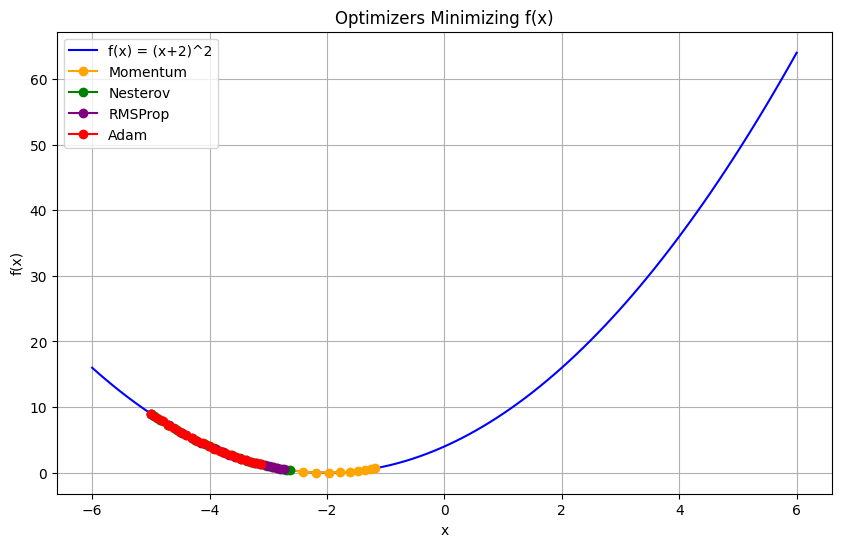

In [7]:
x_vals = np.linspace(-6, 6, 100)
f_vals = f(x_vals)

plt.figure(figsize=(10,6))
plt.plot(x_vals, f_vals, label="f(x) = (x+2)^2", color='blue')

optims = {
    "Momentum": momentum(-5),
    "Nesterov": nesterov(-5),
    "RMSProp": rmsprop(-5),
    "Adam": adam(-5)
}

colors = ['orange', 'green', 'purple', 'red']

for (name, path), c in zip(optims.items(), colors):
    path = np.array(path)
    plt.plot(path, f(path), 'o-', label=name, color=c)

plt.title("Optimizers Minimizing f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## Insights

| Optimizer | Best For                       | Key Benefit                          | Weakness                          |
| --------- | ------------------------------ | ------------------------------------ | --------------------------------- |
| Momentum  | Bumpy loss landscapes          | Smooth and fast convergence          | Still overshoots sometimes        |
| Nesterov  | Complex, curved paths          | Lookahead improves stability         | Slightly more complex math        |
| RMSProp   | Non-stationary problems (RNNs) | Per-parameter adaptive learning rate | Can stagnate in flat regions      |
| Adam      | Most deep learning tasks       | Combines all benefits, robust        | Might generalize poorly sometimes |


# Section 5: Convex Functions & Convex Optimization

## 5.1 What is a Convex Function?

- A function f:R
n
 →R is **convex** if:

$$
f(\lambda x + (1 - \lambda) y) \leq \lambda f(x) + (1 - \lambda) f(y), \quad \forall x, y \in \mathbb{R}^n, \, \lambda \in [0, 1]
$$

- This means the **line segment between any two points** on the function lies **above the function curve**.

- Properties of Convex Functions

  - **Global minimum = local minimum**
  - For 1D functions, convexity implies:

$$
f''(x) \geq 0
$$
  - **Convex sets + convex functions** → **Convex optimization problems**

---

### Convex vs Non-Convex (Intuition)

| Property       | Convex Function         | Non-Convex Function          |
|----------------|--------------------------|-------------------------------|
| Guarantees     | Global minimum exists    | May have local minima         |
| Optimization   | Easier, guaranteed       | Harder, needs heuristics      |
| Example        | \( f(x) = x^2 \)         | \( f(x) = x^4 - 3x^3 + 2 \)   |

---

## Convex Optimization Problem

An optimization problem is **convex** if:

- The **objective function** is convex
- The **feasible set** (defined by constraints) is convex

**Standard form:**

$$
\min_{x} \quad f(x) \quad \text{subject to} \quad g_i(x) \leq 0, \quad h_j(x) = 0
$$

### 5.2 Visualizing Convex vs Non-Convex

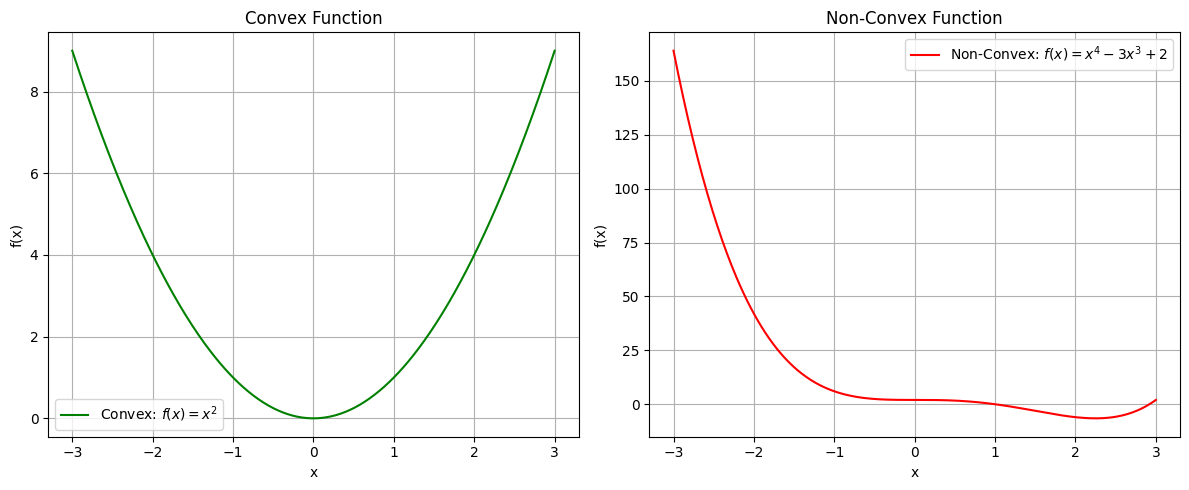

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 400)

# Convex: x^2
f_convex = x**2

# Non-Convex: x^4 - 3x^3 + 2
f_nonconvex = x**4 - 3*x**3 + 2

plt.figure(figsize=(12, 5))

# Convex plot
plt.subplot(1, 2, 1)
plt.plot(x, f_convex, label='Convex: $f(x) = x^2$', color='green')
plt.title('Convex Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# Non-Convex plot
plt.subplot(1, 2, 2)
plt.plot(x, f_nonconvex, label='Non-Convex: $f(x) = x^4 - 3x^3 + 2$', color='red')
plt.title('Non-Convex Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Insights

- Why Convexity Matters in ML:

| Benefit                    | Explanation                                                         |
| -------------------------- | ------------------------------------------------------------------- |
| **Efficient optimization** | Gradient descent converges to **global minimum** in convex settings |
| **Theoretical guarantees** | Easier to prove convergence and analyze error bounds                |
| **Model interpretability** | Many loss functions (e.g., MSE, Logistic Loss) are convex           |

---

- Mean Squared Error (MSE)
  - Used in regression problems.

$$
L = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

  - Applications
    - Convex  
    - Differentiable  
    - Penalizes larger errors more heavily

---

- Log Loss (Binary Cross Entropy)
  - Used in binary classification tasks.

$$
L = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

  - Applications
    - Convex  
    - Handles probabilistic outputs  
    - Encourages confident and correct predictions

---

# Section 6: Constrained Optimization with Lagrange Multipliers

## 6.1 Problem Formulation: Constrained Optimization using Lagrange Multipliers

Suppose you want to solve the optimization problem:

$$
\text{Minimize: } f(x, y) \\
\text{Subject to: } g(x, y) = 0
$$

---

### Lagrangian Formulation

- We combine the objective and the constraint using a **Lagrange multiplier** λ:

$$
\mathcal{L}(x, y, \lambda) = f(x, y) + \lambda \cdot g(x, y)
$$

---

### Necessary Conditions for Optimality

- To find the optimum, solve the following system of equations (set gradients to zero):

$$
\nabla_x \mathcal{L} = 0, \quad \nabla_y \mathcal{L} = 0, \quad \nabla_\lambda \mathcal{L} = 0
$$

- Which gives the partial derivative conditions:

$$
\frac{\partial \mathcal{L}}{\partial x} = 0, \quad
\frac{\partial \mathcal{L}}{\partial y} = 0, \quad
\frac{\partial \mathcal{L}}{\partial \lambda} = g(x, y) = 0
$$

---

### Geometric Intuition

- At the optimum, the gradient of the objective is parallel to the gradient of the constraint:

$$
\nabla f(x, y) = -\lambda \nabla g(x, y)
$$

- This implies that we **cannot decrease** \( f(x, y) \) any further **without violating the constraint**.

---

### Summary
- **Lagrange multipliers** help handle equality constraints elegantly.
- The gradients must align (or oppose) at optimality.
- This method can extend to **multiple constraints** and **higher dimensions**.



## 6.2 Constrained Optimization using Lagrange Multipliers

### Problem:

- Minimize the function:
$$
f(x, y) = x^2 + y^2
$$

- Subject to the constraint:
$$
g(x, y) = x + y - 1 = 0
$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

# Define symbols
x, y, λ = symbols('x y λ')

# Define functions
f = x**2 + y**2                     # Objective function
g = x + y - 1                       # Constraint

# Lagrangian
L = f + λ * g

# Partial derivatives
grad_x = L.diff(x)
grad_y = L.diff(y)
grad_λ = L.diff(λ)

# Solve equations
solution = solve([grad_x, grad_y, grad_λ], (x, y, λ))
solution

{x: 1/2, y: 1/2, λ: -1}

### Visualization

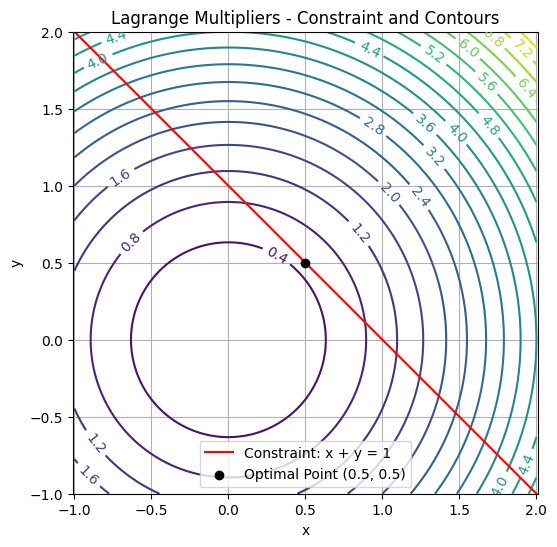

In [10]:
# Plotting the constraint and contours
x_vals = np.linspace(-1, 2, 400)
y_vals = np.linspace(-1, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + Y**2

plt.figure(figsize=(6, 6))
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contours)
plt.plot(x_vals, 1 - x_vals, label='Constraint: x + y = 1', color='red')
plt.scatter(0.5, 0.5, color='black', label='Optimal Point (0.5, 0.5)', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Multipliers - Constraint and Contours')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

### Insights

- When to use this principle

| Situation                            | Use Lagrange Multipliers? |
| ------------------------------------ | ------------------------- |
| Unconstrained problem                |  No                      |
| Equality constraint only $g(x) = 0$  |  Yes                     |
| Multiple constraints                 |  Works with multiple λ   |
| Inequality constraints $g(x) \leq 0$ |  Use **KKT conditions**  |


- Applications in ML:
  - Support Vector Machines: dual form involves Lagrange multipliers
  - PCA with unit norm constraint
  - Optimization with normalization (e.g., weights sum to 1)

# Section 7: Linear Programming (LP)

## 7.1 General Form of a Linear Program (LP)

### Problem Statement:

- Minimize (or Maximize):
$$
c^T x
$$

- Subject to:
$$
Ax \leq b
$$

### Where:

- x ∈ R^n: Decision variables  
- c ∈ R^n: Coefficients in the objective function  
- A ∈ R^m×n,𝑏 ∈ 𝑅^𝑚: Constraint matrix and vector

---

### Assumptions in Linear Programming:

- The objective function is **linear**
- All constraints are **linear inequalities or equalities**
- The feasible region is a **convex polyhedron**

---

### Graphical Intuition (2D Case):

- **Feasible region**: A polygon (or polyhedron in higher dimensions) formed by the intersection of half-planes
- **Optimal solution**: Always lies at a **vertex** (corner point) of the feasible region


## 7.2 Problem Example: Linear Programming

### Objective:
- Maximize:
$$
3x + 5y
$$

- Subject to Constraints:
$$
\begin{align*}
x + 2y &\leq 6 \\
3x + 2y &\leq 12 \\
x, y &\geq 0
\end{align*}
$$


In [11]:
from scipy.optimize import linprog

# Coefficients for objective function (note: minimizing -profit)
c = [-3, -5]

# Coefficients for inequalities
A = [
    [1, 2],
    [3, 2]
]

b = [6, 12]

# Bounds for x and y (both ≥ 0)
x_bounds = (0, None)
y_bounds = (0, None)

# Solve
res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -16.5
              x: [ 3.000e+00  1.500e+00]
            nit: 2
          lower:  residual: [ 3.000e+00  1.500e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-2.250e+00 -2.500e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

### Visualization

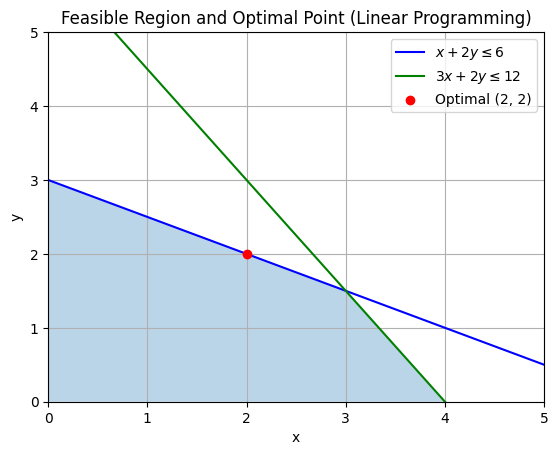

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 5, 200)
y1 = (6 - x)/2
y2 = (12 - 3*x)/2

plt.plot(x, y1, label=r'$x + 2y \leq 6$', color='blue')
plt.plot(x, y2, label=r'$3x + 2y \leq 12$', color='green')
plt.fill_between(x, 0, np.minimum(y1, y2), where=(np.minimum(y1, y2) >= 0), alpha=0.3)

plt.scatter(2, 2, color='red', label='Optimal (2, 2)', zorder=5)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region and Optimal Point (Linear Programming)')
plt.legend()
plt.grid(True)
plt.show()

### Insights

- Characteritics of LP:

| Feature         | LP                      |
| --------------- | ----------------------- |
| Objective       | Linear                  |
| Constraints     | Linear                  |
| Feasible region | Convex polygon/polytope |
| Solution type   | Always at a vertex      |


# Section 8: Quadratic Programming (QP)

## 8.1 General Form of Quadratic Programming (QP)

### Objective:
- Minimize:
$$
\frac{1}{2} x^T Q x + c^T x
$$

- Subject to:
$$
A x \leq b
$$

- Where:
  - 𝑥 ∈ R^n: decision variables  
  - Q ∈ R^n×n: symmetric positive semi-definite matrix (ensures convexity)  
  - c ∈ R^n: linear coefficients  
  - A ∈ R^m×n,𝑏 ∈ 𝑅^𝑚: linear inequality constraints

- Use-Cases:
  - Support Vector Machines (SVMs)  
  - Portfolio optimization  
  - Trajectory planning in robotics or control systems


## 8.2 Problem:

- Minimize:
$$
f(x_1, x_2) = \frac{1}{2}(x_1^2 + x_2^2) - x_1 - x_2
$$

- Subject to:
$$
x_1 + x_2 \leq 1,\quad x_1 \geq 0,\quad x_2 \geq 0
$$


In [13]:
import cvxpy as cp

# Define variables
x = cp.Variable(2)

# Define the objective function
Q = cp.Constant([[1.0, 0.0], [0.0, 1.0]])
objective = cp.Minimize(0.5 * cp.quad_form(x, Q) - cp.sum(x))

# Define constraints
constraints = [x[0] + x[1] <= 1, x >= 0]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve it
problem.solve()

# Output
print("Optimal x:", x.value)
print("Minimum value:", problem.value)

Optimal x: [0.5 0.5]
Minimum value: -0.75


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/constants/constant.py:52: UserWarning: Initializing a Constant with a nested list is undefined behavior. Consider using a numpy array instead.
  warnings.warn(NESTED_LIST_WARNING)


### Visualization (Contour + Constraints)

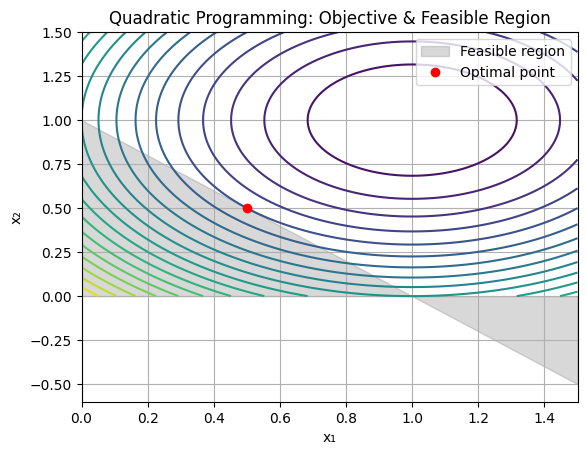

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0, 1.5, 100)
x2 = np.linspace(0, 1.5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Objective function
Z = 0.5 * (X1**2 + X2**2) - X1 - X2

# Constraint line
constraint = X1 + X2 <= 1

plt.contour(X1, X2, Z, levels=20, cmap='viridis')
plt.fill_between(x1, 0, 1 - x1, color='gray', alpha=0.3, label='Feasible region')
plt.plot(0.5, 0.5, 'ro', label='Optimal point')
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Quadratic Programming: Objective & Feasible Region')
plt.legend()
plt.grid(True)
plt.show()

### Insights

| Feature            | Quadratic Programming                  |
| ------------------ | -------------------------------------- |
| Objective Function | Quadratic                              |
| Constraints        | Linear                                 |
| Convexity Needed?  | Yes (Q must be positive semi-definite) |
| Applications       | ML (SVM), Finance, Robotics            |


# Section 9: Optimization in ML (Loss Functions, Regularization)

## 9.1 Loss Functions (Objective Functions)
- Loss functions quantify the error between predicted output and actual output.

| Model Type     | Loss Function Name                   | Loss Function Formula                                                                                 |
|----------------|--------------------------------------|--------------------------------------------------------------------------------------------------------|
| Regression     | **Mean Squared Error (MSE)**         | $\displaystyle \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$                                         |
| Regression     | **Mean Absolute Error (MAE)**        | $\displaystyle \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$                                           |
| Classification | **Binary Cross Entropy (Log Loss)**  | $\displaystyle -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i) \right]$ |
| Classification | **Hinge Loss (for SVM)**             | $\displaystyle \sum_{i=1}^{n} \max(0,\ 1 - y_i \cdot \hat{y}_i)$                                       |


## 9.2 Regularization
- Regularization adds a penalty to the loss function to prevent overfitting.

| Type        | Penalty Term                                      | Primary Use                        |
|-------------|---------------------------------------------------|-------------------------------------|
| **L1 (Lasso)**  | $\lambda \sum_{i=1}^{n} |w_i|$                      | Sparsity / Feature Selection         |
| **L2 (Ridge)**  | $\lambda \sum_{i=1}^{n} w_i^2$                    | Smooth Shrinkage of Weights         |
| **Elastic Net** | $\lambda_1 \sum_{i=1}^{n} |w_i| + \lambda_2 \sum_{i=1}^{n} w_i^2$ | Combines L1 and L2 Benefits |


### Let’s use Gradient Descent to fit a linear regression model with MSE + L2 regularization (Ridge Regression).

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Data
np.random.seed(1)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term
X_b = np.c_[np.ones((100, 1)), X]  # Add x0 = 1 to each instance

# Hyperparameters
learning_rate = 0.1
n_iterations = 1000
m = 100
lambda_l2 = 0.1

# Initialize weights
theta = np.random.randn(2, 1)

# Gradient Descent
for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y) + 2 * lambda_l2 * theta
    theta = theta - learning_rate * gradients

print("Final theta (weights):\n", theta)

Final theta (weights):
 [[3.70239242]
 [3.01156426]]


### Visualization

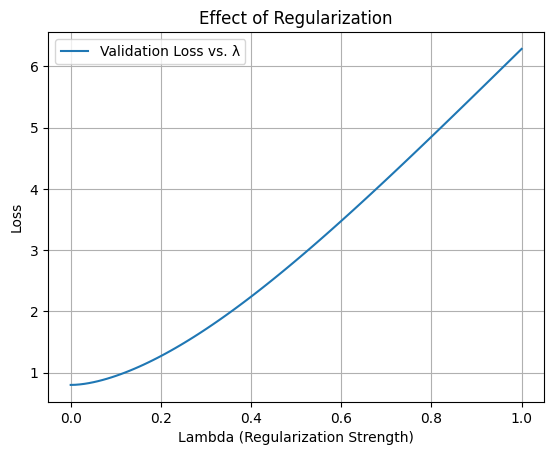

In [16]:
lambdas = np.linspace(0, 1, 100)
losses = []

for l in lambdas:
    theta = np.random.randn(2, 1)
    for _ in range(200):
        grad = (2/m) * X_b.T.dot(X_b.dot(theta) - y) + 2 * l * theta
        theta = theta - 0.1 * grad
    loss = np.mean((X_b.dot(theta) - y)**2)
    losses.append(loss)

plt.plot(lambdas, losses, label="Validation Loss vs. λ")
plt.xlabel("Lambda (Regularization Strength)")
plt.ylabel("Loss")
plt.title("Effect of Regularization")
plt.grid(True)
plt.legend()
plt.show()

### Insights

| Concept         | Insight                                      |
| --------------- | -------------------------------------------- |
| Loss Function   | Defines objective to minimize                |
| Optimization    | Adjusts weights to reduce error              |
| Regularization  | Controls model complexity                    |
| Landscape Shape | Affects convergence speed and final solution |


# Section 10: Applications in Deep Learning

## 10.1 Why Not Just Gradient Descent?
- Vanilla Gradient Descent is slow and sensitive to learning rates.
- For high-dimensional, noisy, or sparse data (as in deep learning), we need more adaptive optimizers.

## 10.2  Common Optimizers in Deep Learning

| Optimizer    | Key Idea                                 | Advantage                          |
| ------------ | ---------------------------------------- | ---------------------------------- |
| **SGD**      | Random sample updates                    | Fast, stochastic                   |
| **Momentum** | Adds velocity to updates                 | Smoother, avoids local minima      |
| **RMSProp**  | Adaptive learning rates using moving avg | Good for non-stationary problems   |
| **Adam**     | Momentum + RMSProp                       | Most widely used, fast convergence |


## 10.3 Adam Optimizer: Step-by-Step

- Adam = **Adaptive Moment Estimation**
- It **combines**:
  - **Momentum**: Uses the **1st moment** (mean of gradients)
  - **RMSProp**: Uses the **2nd moment** (uncentered variance)

- Update Rules at Each Step
  - Let:
    - $g_t$ = Gradient at step $t$
    - $\beta_1$, $\beta_2$ = Decay rates for the moment estimates
    - $\alpha$ = Learning rate
    - $\epsilon$ = Small constant for numerical stability (typically $10^{-8}$)

- Compute Biased First Moment Estimate (Momentum)
$$
m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t
$$

- Compute Biased Second Moment Estimate (RMSProp-like)
$$
v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2
$$

- Bias Correction (to counteract initialization at zero)

  - **First moment (mean):**
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$$

  - **Second moment (variance):**
$$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

- Parameter Update Rule
$$
\theta_t = \theta_{t-1} - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

- **Summary**:
  - Combines advantages of **momentum** and **adaptive learning rates**
  - Performs well in **non-stationary** and **sparse gradient** settings
  - Common defaults: $\beta_1 = 0.9$, $\beta_2 = 0.999$, $\epsilon = 10^{-8}$



## 10.4 Adam Optimizer (from scratch)

We’ll optimize a simple quadratic loss function of the form:

$$
L = (w \cdot x - y)^2
$$

### Where:
- $w$ = model weight (parameter to be learned)
- $x$ = input feature
- $y$ = actual target output

This is the **squared error loss**, commonly used in **linear regression**.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([1.0, 2.0, 3.0])
y = np.array([2.0, 4.0, 6.0])  # Target: y = 2x

# Initialize
w = 0.0
alpha = 0.1
beta1, beta2 = 0.9, 0.999
eps = 1e-8
m, v = 0.0, 0.0

losses = []

# Training loop
for t in range(1, 301):
    grad = np.mean(2 * x * (w * x - y))  # dL/dw

    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * grad**2

    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)

    w -= alpha * m_hat / (np.sqrt(v_hat) + eps)

    loss = np.mean((w * x - y)**2)
    losses.append(loss)

print(f"Optimized weight: w ≈ {w:.4f}")

Optimized weight: w ≈ 2.0000


### Visualization

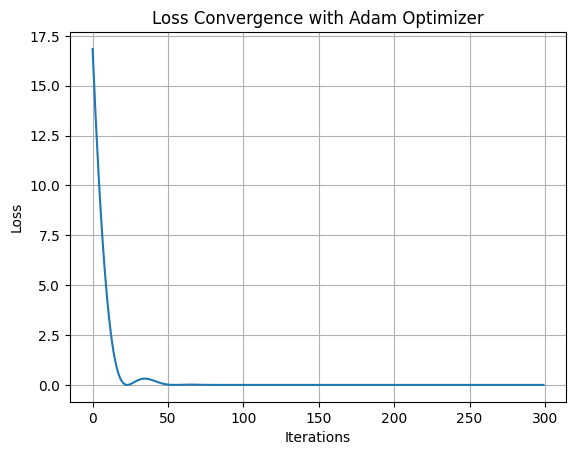

In [18]:
plt.plot(losses)
plt.title("Loss Convergence with Adam Optimizer")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

### Insights

| Concept        | Insight                                                              |
| -------------- | -------------------------------------------------------------------- |
| Adam           | Combines momentum and adaptive scaling                               |
| Real-world use | Used in CNNs, RNNs, Transformers, etc.                               |
| Benefit        | Fast convergence, less tuning                                        |
| Caution        | May sometimes overfit if unchecked (e.g., learning rate decay helps) |


# Final Summary: Optimization for AI/ML

This notebook explored the **fundamentals and practical algorithms** of optimization, tailored for machine learning and deep learning applications. Each section connected mathematical theory to **Python code** and **visualizations**, including from-scratch implementations of key optimizers.

---

## Key Concepts Covered

### Core Optimization Theory
- **Introduction to Optimization**: Definitions, objectives, types (constrained vs. unconstrained).
- **Unconstrained Optimization**: Cost functions, gradients, minima.
- **Convex Functions**: Convexity, properties, importance in optimization.

### Gradient-Based Methods
- **Gradient Descent**: From-scratch implementation with visual intuition.
- **Variants**:
  - Stochastic Gradient Descent (SGD)
  - Mini-batch Gradient Descent
  - Momentum
  - Nesterov Accelerated Gradient
  - RMSProp
  - Adam Optimizer (with derivation and code)

### Constrained Optimization
- **Lagrange Multipliers**: Mathematical formulation and geometric intuition.
- **Linear Programming (LP)**: Objective function optimization under linear constraints.
- **Quadratic Programming (QP)**: Second-order optimization in ML contexts.

### Optimization in ML
- **Loss Landscapes**: Visualizing common loss surfaces.
- **Loss Functions**: MSE, Cross-Entropy, Hinge Loss.
- **Regularization**: L1, L2, dropout, weight decay.

### Deep Learning Optimization
- **Practical Optimizers**: Adam, RMSProp, etc., with working code.
- **Training Dynamics**: How optimizers affect convergence, stability, and generalization.

---

##  From-Scratch Implementations

- Gradient Descent on Quadratic Loss
- SGD vs. Batch vs. Mini-batch Comparison
- Adam Optimizer Step-by-Step
- Lagrangian Method on Equality Constraint Problem
- Linear Program using `scipy.optimize.linprog`
- Loss Surface Visualization in 2D
- Regularized Linear Regression (L2 Ridge)

---

##  Visualizations for Intuition

- Gradient descent steps and learning rates
- Loss landscapes (convex, non-convex)
- Optimization path with and without momentum
- Adam convergence curve
- Effect of regularization on loss

---

## Applications to Machine Learning & Deep Learning

| Area                        | Optimization Application                     |
|----------------------------|-----------------------------------------------|
| Regression & Classification | Loss minimization, regularization            |
| Neural Networks             | Backpropagation + optimizer choice           |
| Support Vector Machines     | Quadratic programming (soft margin SVM)      |
| Feature Selection           | L1 regularization (sparsity)                 |
| PCA & Matrix Factorization  | Constrained optimization, eigen decomposition|
| Training Stability          | Optimizers like Adam, RMSProp for convergence|

---

